In [1]:
import torch

if torch.cuda.is_available():
    print(f"✅ GPU is available! - {torch.cuda.get_device_name(0)}")
    print(f"🔥 CUDA Version: {torch.version.cuda}")
    print(f"🛠️ GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("❌ GPU not detected! Running on CPU.")


✅ GPU is available! - NVIDIA GeForce RTX 3060
🔥 CUDA Version: 11.8
🛠️ GPU Memory: 12.88 GB


In [2]:
import os
import cv2
import torch
import torchvision.transforms as transforms
from tqdm import tqdm
from PIL import Image

# Define dataset paths
chaksu_train_path = r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Train\Train"
chaksu_test_path = r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Test\Test"
papila_path = r"D:\ProjectML2 - Glaucoma\archive\PAPILA\PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f"

# Define output path for preprocessed images
output_path = r"D:\ProjectML2 - Glaucoma\Preprocessed_Images"

# Create directories
os.makedirs(output_path, exist_ok=True)
os.makedirs(os.path.join(output_path, "Chaksu_Train"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Chaksu_Test"), exist_ok=True)
os.makedirs(os.path.join(output_path, "Papila"), exist_ok=True)

# Define transformations (resize, normalize, and augmentations)
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to 512x512
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to [-1,1] range
])

# Function to process images
def preprocess_images(input_folder, output_folder):
    for root, _, files in os.walk(input_folder):
        for file in tqdm(files, desc=f"Processing {os.path.basename(input_folder)}"):
            if file.endswith((".jpg", ".png", ".jpeg")):
                img_path = os.path.join(root, file)
                img = Image.open(img_path).convert("RGB")  # Open image in RGB mode
                
                # Apply transformations
                img = transform(img)
                
                # Save processed image as tensor
                save_path = os.path.join(output_folder, file.replace(".jpg", ".pt").replace(".png", ".pt"))
                torch.save(img, save_path)

# Process images from all datasets
preprocess_images(chaksu_train_path, os.path.join(output_path, "Chaksu_Train"))
preprocess_images(chaksu_test_path, os.path.join(output_path, "Chaksu_Test"))
preprocess_images(papila_path, os.path.join(output_path, "Papila"))

print("✅ Fundus image preprocessing complete! Images saved as PyTorch tensors.")


Processing Test: 100%|███████████████████████████████████| 3/3 [00:00<?, ?it/s]
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 2/
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 2/
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 1/
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 19
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 48
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 48
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 4/
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 1/
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 10
Processing PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f: 100%|█| 10

✅ Fundus image preprocessing complete! Images saved as PyTorch tensors.


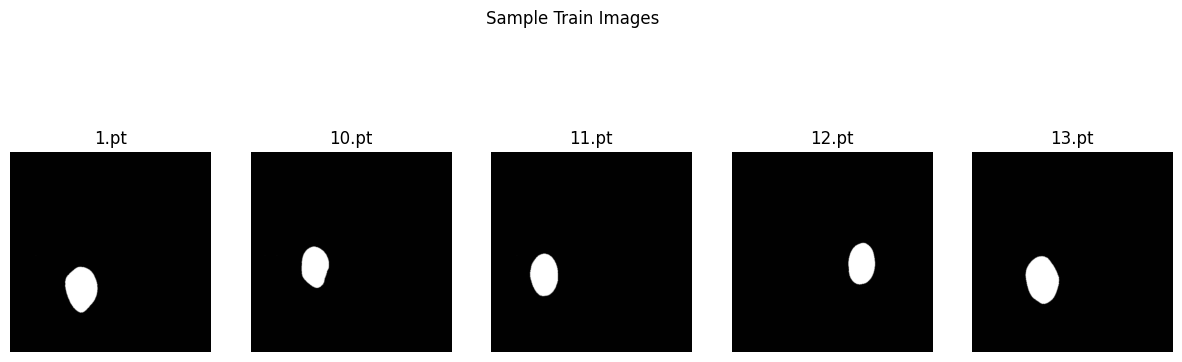

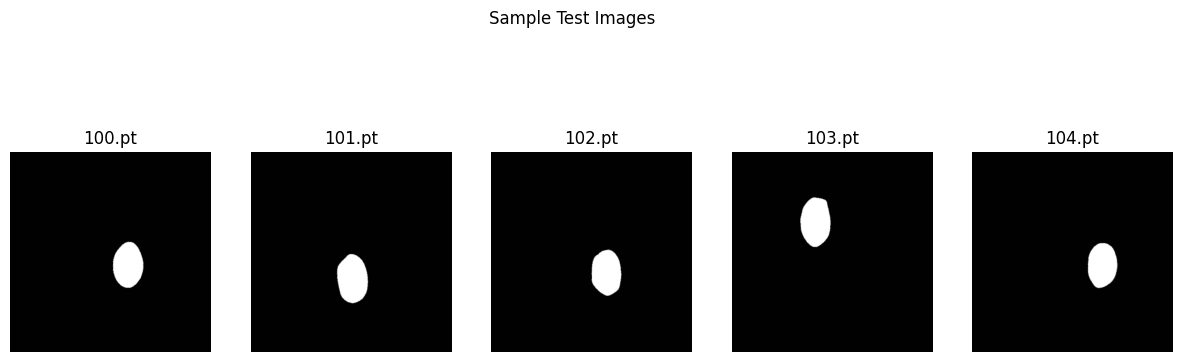

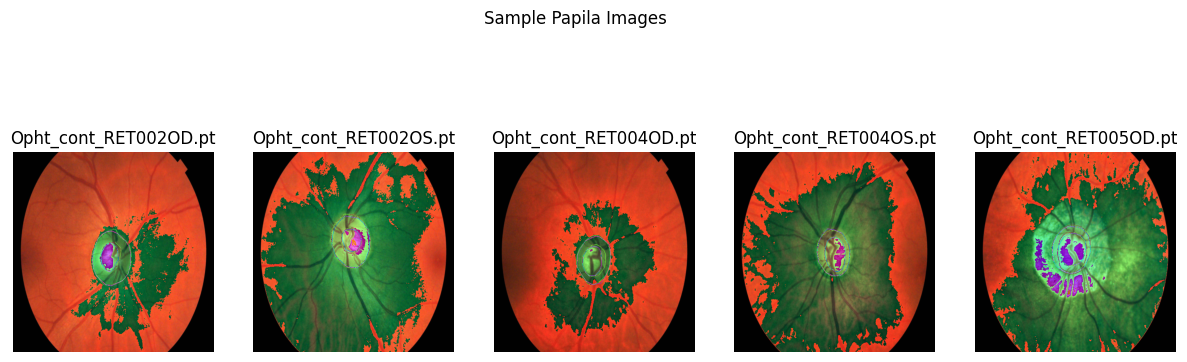

✅ Dataset loaded and visualized successfully!


In [49]:
import os
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

# Define paths
preprocessed_path = r"D:\ProjectML2 - Glaucoma\Preprocessed_Images"

# Function to load tensors
def load_tensors(folder, num_samples=5):
    """Loads a few sample tensors from the preprocessed folder."""
    tensor_files = [f for f in os.listdir(folder) if f.endswith(".pt")]
    tensors = []
    for file in tensor_files[:num_samples]:  # Load only a few samples
        tensor = torch.load(os.path.join(folder, file))
        tensors.append(tensor)
    return tensors, tensor_files[:num_samples]

# Load sample images
train_tensors, train_filenames = load_tensors(os.path.join(preprocessed_path, "Chaksu_Train"))
test_tensors, test_filenames = load_tensors(os.path.join(preprocessed_path, "Chaksu_Test"))
papila_tensors, papila_filenames = load_tensors(os.path.join(preprocessed_path, "Papila"))

# Function to visualize tensors
def show_images(tensors, filenames, title):
    fig, axes = plt.subplots(1, len(tensors), figsize=(15, 5))
    for i, tensor in enumerate(tensors):
        img = transforms.ToPILImage()(tensor)  # Convert tensor to image
        axes[i].imshow(img)
        axes[i].set_title(filenames[i])
        axes[i].axis("off")
    plt.suptitle(title)
    plt.show()

# Show train images
show_images(train_tensors, train_filenames, "Sample Train Images")
# Show test images
show_images(test_tensors, test_filenames, "Sample Test Images")
# Show papila images
show_images(papila_tensors, papila_filenames, "Sample Papila Images")

print("✅ Dataset loaded and visualized successfully!")


In [51]:
for file in train_metadata_files:
    file_path = os.path.join(r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Train\Train\6.0_Glaucoma_Decision", file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"🔍 Checking {file} → Columns: {df.columns.tolist()}")  # Debugging step


🔍 Checking Glaucoma_Decision_Comparison_Bosch.csv → Columns: ['Images', 'Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'Expert 5']
🔍 Checking Glaucoma_Decision_Comparison_Bosch_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']
🔍 Checking Glaucoma_Decision_Comparison_Forus.csv → Columns: ['Images', 'Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'Expert 5']
🔍 Checking Glaucoma_Decision_Comparison_Forus_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']
🔍 Checking Glaucoma_Decision_Comparison_Remidio.csv → Columns: ['Images', 'Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'Expert 5']
🔍 Checking Glaucoma_Decision_Comparison_Remidio_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']


In [52]:
import pandas as pd
import os

# Define metadata file paths
train_metadata_files = [
    "Glaucoma_Decision_Comparison_Bosch_majority.csv",
    "Glaucoma_Decision_Comparison_Forus_majority.csv",
    "Glaucoma_Decision_Comparison_Remidio_majority.csv"
]

train_metadata_list = []

# ✅ Load & Process Train Metadata
for file in train_metadata_files:
    file_path = os.path.join(r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Train\Train\6.0_Glaucoma_Decision", file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"🔍 Processing {file} → Columns: {df.columns.tolist()}")  # Debugging

        # Rename "Majority Decision" to "Glaucoma"
        if "Majority Decision" in df.columns:
            df.rename(columns={"Majority Decision": "Glaucoma"}, inplace=True)
            df["Glaucoma"] = df["Glaucoma"].str.strip().replace({"GLAUCOMA SUSUPECT": "GLAUCOMA SUSPECT"})  # Fix typos
            train_metadata_list.append(df[["Images", "Glaucoma"]])
        else:
            print(f"❌ Skipping {file} (No Majority Decision column)")

# ✅ Merge all metadata
if train_metadata_list:
    metadata_train = pd.concat(train_metadata_list, ignore_index=True)
    print("✅ Train metadata processed successfully!")
    print(metadata_train.head())

# ✅ Save Processed Metadata
train_metadata_path = r"D:\ProjectML2 - Glaucoma\Processed\Train_Metadata.csv"
metadata_train.to_csv(train_metadata_path, index=False)
print(f"✅ Saved Train Metadata to {train_metadata_path}")


🔍 Processing Glaucoma_Decision_Comparison_Bosch_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']
🔍 Processing Glaucoma_Decision_Comparison_Forus_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']
🔍 Processing Glaucoma_Decision_Comparison_Remidio_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']
✅ Train metadata processed successfully!
                        Images          Glaucoma
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT
1  Image102.jpg-Image102-1.jpg            NORMAL
2  Image103.jpg-Image103-1.jpg            NORMAL
3  Image104.jpg-Image104-1.jpg            NORMAL
4  Image105.jpg-Image105-1.jpg            NORMAL
✅ Saved Train Metadata to D:\ProjectML2 - Glaucoma\Processed\Train_Metadata.csv


In [53]:
# Define test metadata files
test_metadata_files = [
    "Glaucoma_Decision_Comparison_Bosch_majority.csv",
    "Glaucoma_Decision_Comparison_Forus_majority.csv",
    "Glaucoma_Decision_Comparison_Remidio_majority.csv"
]

test_metadata_list = []

# ✅ Load & Process Test Metadata
for file in test_metadata_files:
    file_path = os.path.join(r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Test\Test\6.0_Glaucoma_Decision", file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"🔍 Processing {file} → Columns: {df.columns.tolist()}")  # Debugging

        # Rename "Majority Decision" to "Glaucoma"
        if "Majority Decision" in df.columns:
            df.rename(columns={"Majority Decision": "Glaucoma"}, inplace=True)
            df["Glaucoma"] = df["Glaucoma"].str.strip().replace({"GLAUCOMA SUSUPECT": "GLAUCOMA SUSPECT"})  # Fix typos
            test_metadata_list.append(df[["Images", "Glaucoma"]])
        else:
            print(f"❌ Skipping {file} (No Majority Decision column)")

# ✅ Merge all metadata
if test_metadata_list:
    metadata_test = pd.concat(test_metadata_list, ignore_index=True)
    print("✅ Test metadata processed successfully!")
    print(metadata_test.head())

# ✅ Save Processed Metadata
test_metadata_path = r"D:\ProjectML2 - Glaucoma\Processed\Test_Metadata.csv"
metadata_test.to_csv(test_metadata_path, index=False)
print(f"✅ Saved Test Metadata to {test_metadata_path}")


🔍 Processing Glaucoma_Decision_Comparison_Bosch_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']
🔍 Processing Glaucoma_Decision_Comparison_Forus_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Glaucoma Decision']
❌ Skipping Glaucoma_Decision_Comparison_Forus_majority.csv (No Majority Decision column)
🔍 Processing Glaucoma_Decision_Comparison_Remidio_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Glaucoma Decision']
❌ Skipping Glaucoma_Decision_Comparison_Remidio_majority.csv (No Majority Decision column)
✅ Test metadata processed successfully!
                        Images          Glaucoma
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT
1  Image102.jpg-Image102-1.jpg            NORMAL
2  Image103.jpg-Image103-1.jpg            NORMAL
3  Image104.jpg-Image104-1.jpg            NORMAL
4  Image105.jpg-Image105-1.jpg           

In [54]:
# Define test metadata files
test_metadata_files = [
    "Glaucoma_Decision_Comparison_Bosch_majority.csv",
    "Glaucoma_Decision_Comparison_Forus_majority.csv",
    "Glaucoma_Decision_Comparison_Remidio_majority.csv"
]

test_metadata_list = []

# ✅ Load & Process Test Metadata
for file in test_metadata_files:
    file_path = os.path.join(r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Test\Test\6.0_Glaucoma_Decision", file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"🔍 Processing {file} → Columns: {df.columns.tolist()}")  # Debugging

        # Check for either "Majority Decision" or "Glaucoma Decision"
        if "Majority Decision" in df.columns:
            df.rename(columns={"Majority Decision": "Glaucoma"}, inplace=True)
        elif "Glaucoma Decision" in df.columns:
            df.rename(columns={"Glaucoma Decision": "Glaucoma"}, inplace=True)

        # Standardize Glaucoma labels
        df["Glaucoma"] = df["Glaucoma"].str.strip().replace({"GLAUCOMA SUSUPECT": "GLAUCOMA SUSPECT"})  # Fix typos
        test_metadata_list.append(df[["Images", "Glaucoma"]])

# ✅ Merge all metadata
if test_metadata_list:
    metadata_test = pd.concat(test_metadata_list, ignore_index=True)
    print("✅ Test metadata processed successfully!")
    print(metadata_test.head())

# ✅ Save Processed Metadata
test_metadata_path = r"D:\ProjectML2 - Glaucoma\Processed\Test_Metadata.csv"
metadata_test.to_csv(test_metadata_path, index=False)
print(f"✅ Saved Test Metadata to {test_metadata_path}")


🔍 Processing Glaucoma_Decision_Comparison_Bosch_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Majority Decision']
🔍 Processing Glaucoma_Decision_Comparison_Forus_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Glaucoma Decision']
🔍 Processing Glaucoma_Decision_Comparison_Remidio_majority.csv → Columns: ['Images', 'Expert.1', 'Expert.2', 'Expert.3', 'Expert.4', 'Expert.5', 'Glaucoma Decision']
✅ Test metadata processed successfully!
                        Images          Glaucoma
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT
1  Image102.jpg-Image102-1.jpg            NORMAL
2  Image103.jpg-Image103-1.jpg            NORMAL
3  Image104.jpg-Image104-1.jpg            NORMAL
4  Image105.jpg-Image105-1.jpg            NORMAL
✅ Saved Test Metadata to D:\ProjectML2 - Glaucoma\Processed\Test_Metadata.csv


In [58]:
def clean_filename(img_name):
    """
    Extracts the portion of the filename before the first dash,
    e.g. "Image101.jpg-Image101-1.jpg" -> "Image101.jpg"
    """
    chunk = img_name.split('-', 1)[0]  # get the substring before first '-'
    return chunk  # e.g. "Image101.jpg"

def load_image_features(image_name):
    # parse out "Image101.jpg" from "Image101.jpg-Image101-1.jpg"
    base_name = clean_filename(image_name)  # e.g. "Image101.jpg"
    
    # remove extension, add .pt
    # e.g. "Image101.jpg" -> base="Image101", ext=".jpg" -> "Image101.pt"
    base, ext = os.path.splitext(base_name)
    pt_filename = f"{base}.pt"  # e.g. "Image101.pt"
    
    feature_path = os.path.join(feature_dir, pt_filename)
    try:
        feature_tensor = torch.load(feature_path)
        return feature_tensor.view(-1).numpy()  # flatten to 1D
    except FileNotFoundError:
        return None


In [60]:
import os

preprocessed_dir = r"D:\ProjectML2 - Glaucoma\Preprocessed_Images\Chaksu_Train"
pt_files = sorted(f for f in os.listdir(preprocessed_dir) if f.endswith(".pt"))
print(f"Found {len(pt_files)} .pt files in Chaksu_Train:")
for f in pt_files[:20]:
    print("  ", f)


Found 1012 .pt files in Chaksu_Train:
   1.pt
   10.pt
   11.pt
   12.pt
   13.pt
   14.pt
   15.pt
   16.pt
   17.pt
   17521.pt
   18.pt
   18499.pt
   19.pt
   2.pt
   20.pt
   21.pt
   22.pt
   23.pt
   24.pt
   25.pt


In [63]:
import pandas as pd

# Example metadata file sets for Chaksu
train_metadata_dir = r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Train\Train\6.0_Glaucoma_Decision"
test_metadata_dir  = r"D:\ProjectML2 - Glaucoma\archive\Chaksu\Test\Test\6.0_Glaucoma_Decision"

train_metadata_files = [
    "Glaucoma_Decision_Comparison_Bosch.csv",
    "Glaucoma_Decision_Comparison_Bosch_majority.csv",
    "Glaucoma_Decision_Comparison_Forus.csv",
    "Glaucoma_Decision_Comparison_Forus_majority.csv",
    "Glaucoma_Decision_Comparison_Remidio.csv",
    "Glaucoma_Decision_Comparison_Remidio_majority.csv"
]

test_metadata_files = [
    "Glaucoma_Decision_Comparison_Bosch.csv",
    "Glaucoma_Decision_Comparison_Bosch_majority.csv",
    "Glaucoma_Decision_Comparison_Forus_majority.csv",
    "Glaucoma_Decision_Comparison_Remidio_majority.csv",
    "Glaucoma_Decision_Majority_Forus.csv",
    "Glaucoma_Decision_Majority_Remidio.csv"
]

def majority_from_experts(row):
    """
    If no 'Majority Decision' col, compute from expert columns:
    e.g. If 3 or more experts have 'GLAUCOMA' in text => 1, else 0
    """
    # count how many contain 'GLAUCOMA'
    count_glaucoma = row.str.contains("GLAUCOMA", case=False, na=False).sum()
    return "GLAUCOMA SUSPECT" if count_glaucoma >= 3 else "NORMAL"

def process_metadata_files(files, base_dir):
    dfs = []
    for file in files:
        file_path = os.path.join(base_dir, file)
        if not os.path.exists(file_path):
            print(f"❌ Missing file: {file_path}")
            continue
        
        df = pd.read_csv(file_path)
        # Standardize column names
        df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(".", "_")

        if "Majority_Decision" in df.columns:
            # rename to "Glaucoma"
            df.rename(columns={"Majority_Decision": "Glaucoma"}, inplace=True)
        elif "Glaucoma_Decision" in df.columns:
            df.rename(columns={"Glaucoma_Decision": "Glaucoma"}, inplace=True)
        else:
            # derive from expert columns if they exist
            expert_cols = [c for c in df.columns if c.startswith("Expert_")]
            if expert_cols:
                df["Glaucoma"] = df[expert_cols].apply(majority_from_experts, axis=1)
            else:
                print(f"❌ No 'Majority Decision' or expert columns in {file}, skipping.")
                continue

        # Standardize 'Glaucoma' strings
        df["Glaucoma"] = df["Glaucoma"].str.strip().replace({"GLAUCOMA SUSUPECT": "GLAUCOMA SUSPECT"})
        
        # Keep only needed columns
        if "Images" in df.columns:
            dfs.append(df[["Images", "Glaucoma"]])
        else:
            print(f"❌ No 'Images' column in {file}, skipping.")
    
    if dfs:
        # Merge all data
        combined = pd.concat(dfs, ignore_index=True).drop_duplicates()
        return combined
    else:
        return pd.DataFrame(columns=["Images", "Glaucoma"])

# ✅ Load train/test metadata
metadata_train = process_metadata_files(train_metadata_files, train_metadata_dir)
metadata_test  = process_metadata_files(test_metadata_files,  test_metadata_dir)

print("✅ Train Metadata shape:", metadata_train.shape)
print(metadata_train.head())

print("✅ Test Metadata shape:", metadata_test.shape)
print(metadata_test.head())

# Save them
os.makedirs(r"D:\ProjectML2 - Glaucoma\Processed", exist_ok=True)
metadata_train.to_csv(r"D:\ProjectML2 - Glaucoma\Processed\Train_Metadata.csv", index=False)
metadata_test.to_csv(r"D:\ProjectML2 - Glaucoma\Processed\Test_Metadata.csv",  index=False)

print("✅ Train & Test metadata processed & saved!")


✅ Train Metadata shape: (1050, 2)
                        Images          Glaucoma
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT
1  Image102.jpg-Image102-1.jpg            NORMAL
2  Image103.jpg-Image103-1.jpg            NORMAL
3  Image104.jpg-Image104-1.jpg            NORMAL
4  Image105.jpg-Image105-1.jpg            NORMAL
✅ Test Metadata shape: (440, 2)
                        Images          Glaucoma
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT
1  Image102.jpg-Image102-1.jpg            NORMAL
2  Image103.jpg-Image103-1.jpg            NORMAL
3  Image104.jpg-Image104-1.jpg            NORMAL
4  Image105.jpg-Image105-1.jpg            NORMAL
✅ Train & Test metadata processed & saved!


In [64]:
import numpy as np
import torch

train_df = pd.read_csv(r"D:\ProjectML2 - Glaucoma\Processed\Train_Metadata.csv")

# Convert string labels to numeric
label_map = {"NORMAL": 0, "GLAUCOMA SUSPECT": 1, "GLAUCOMA": 1}
train_df["Glaucoma"] = train_df["Glaucoma"].replace(label_map)

# Directory with .pt files for train images
train_img_dir = r"D:\ProjectML2 - Glaucoma\Preprocessed_Images\Chaksu_Train"

def get_pt_filename(img_name):
    """
    For example, if 'Images' is 'Image101.jpg-Image101-1.jpg',
    we keep the chunk before the first dash and rename extension to .pt.
    e.g. 'Image101.jpg' -> 'Image101.pt'
    """
    chunk = img_name.split('-', 1)[0]  # 'Image101.jpg'
    base, ext = os.path.splitext(chunk)  # base='Image101', ext='.jpg'
    return f"{base}.pt"                 # 'Image101.pt'

def load_image_feature(img_name):
    """
    Convert metadata's 'Images' to .pt filename and load the tensor -> flatten to array.
    """
    pt_file = get_pt_filename(img_name)
    feature_path = os.path.join(train_img_dir, pt_file)
    try:
        tensor = torch.load(feature_path)  # shape: (3, 512, 512) from your transform
        # flatten to a 1D vector
        return tensor.view(-1).numpy()
    except FileNotFoundError:
        return None

# Create 'Features' column
train_df["Features"] = train_df["Images"].apply(load_image_feature)

# Drop rows with missing features
train_df = train_df.dropna(subset=["Features"])
print("✅ After loading features, shape:", train_df.shape)

# Prepare for SMOTE
X_train = np.vstack(train_df["Features"].values)  # numeric feature array
y_train = train_df["Glaucoma"].values

print("✅ X_train shape:", X_train.shape)
print("✅ y_train distribution:", pd.Series(y_train).value_counts())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6684\2502560370.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["Glaucoma"] = train_df["Glaucoma"].replace(label_map)


✅ After loading features, shape: (1009, 3)
✅ X_train shape: (1009, 786432)
✅ y_train distribution: 0    872
1    137
Name: count, dtype: int64


In [ ]:
import os
import torch
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# 1) Load Train Metadata (Images + Glaucoma)
train_metadata = pd.read_csv(r"D:\ProjectML2 - Glaucoma\Processed\Train_Metadata.csv")

# 2) Convert "Glaucoma" from strings to numeric (if not done already)
label_map = {"NORMAL": 0, "GLAUCOMA SUSPECT": 1, "GLAUCOMA": 1}
train_metadata["Glaucoma"] = train_metadata["Glaucoma"].replace(label_map)

# 3) Directory containing .pt files for train images
#    e.g. D:\ProjectML2 - Glaucoma\Preprocessed_Images\Chaksu_Train
pt_dir = r"D:\ProjectML2 - Glaucoma\Preprocessed_Images\Chaksu_Train"

def parse_filename(img_name: str) -> str:
    """
    Example logic:
    'Image101.jpg-Image101-1.jpg' -> 'Image101.jpg'
    Then 'Image101.jpg' -> 'Image101.pt'
    Adjust to match your actual .pt filenames in pt_dir.
    """
    # Keep only chunk before first dash
    base_chunk = img_name.split('-', 1)[0]  # e.g. "Image101.jpg"
    # Remove extension + add .pt
    base, ext = os.path.splitext(base_chunk)  # e.g. base="Image101", ext=".jpg"
    return f"{base}.pt"                      # "Image101.pt"

def load_numeric_feature(img_name: str):
    """
    Load the .pt file for an image, flatten it, return as a 1D numpy array.
    Return None if file missing.
    """
    pt_file = parse_filename(img_name)  # e.g. "Image101.pt"
    full_path = os.path.join(pt_dir, pt_file)
    try:
        tensor = torch.load(full_path)   # shape: (3, 512, 512)
        return tensor.view(-1).numpy()   # flatten to shape: (3*512*512, )
    except FileNotFoundError:
        return None

# 4) Create "Features" column
train_metadata["Features"] = train_metadata["Images"].apply(load_numeric_feature)

# 5) Drop rows with missing features (None)
train_metadata = train_metadata.dropna(subset=["Features"])
print("✅ After loading numeric features, shape:", train_metadata.shape)

# 6) Prepare arrays for SMOTE
X_train = np.vstack(train_metadata["Features"].values)  # shape: (#samples, #features)
y_train = train_metadata["Glaucoma"].values

print("Labels distribution:", pd.Series(y_train).value_counts())

# 7) Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("✅ Balanced distribution:", pd.Series(y_resampled).value_counts())

# 8) Build a DataFrame *without* image filenames for new synthetic samples
balanced_df = pd.DataFrame({
    "Features": [list(v) for v in X_resampled],  # store as list of floats
    "Glaucoma": y_resampled
})
balanced_df.to_csv(r"D:\ProjectML2 - Glaucoma\Processed\Balanced_Train_Features.csv", index=False)
print("✅ Saved Balanced Train Features!")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6684\2611371231.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_metadata["Glaucoma"] = train_metadata["Glaucoma"].replace(label_map)


✅ After loading numeric features, shape: (1009, 3)
Labels distribution: 0    872
1    137
Name: count, dtype: int64
✅ Balanced distribution: 1    872
0    872
Name: count, dtype: int64


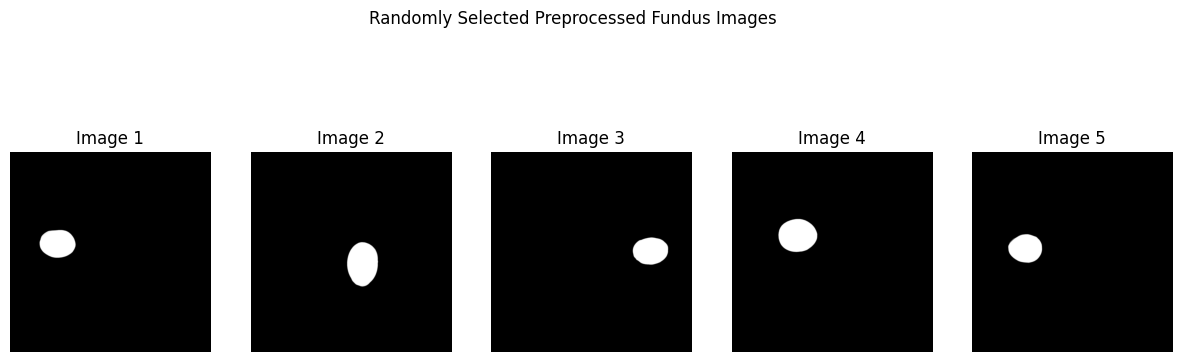

In [3]:
import torch
import matplotlib.pyplot as plt
import random
import os

# Define the preprocessed image directory
preprocessed_dir = "D:/ProjectML2 - Glaucoma/Preprocessed_Images/Chaksu_Train/"

# List all tensor files in the directory
tensor_files = [f for f in os.listdir(preprocessed_dir) if f.endswith('.pt')]

# Ensure the directory has files
if not tensor_files:
    raise ValueError("No preprocessed images found in the directory.")

# Select a few random images to visualize
num_images = 5
selected_files = random.sample(tensor_files, min(num_images, len(tensor_files)))

# Plot the selected images
fig, axes = plt.subplots(1, len(selected_files), figsize=(15, 5))
for i, file in enumerate(selected_files):
    tensor_path = os.path.join(preprocessed_dir, file)
    image_tensor = torch.load(tensor_path)  # Load the PyTorch tensor
    image = image_tensor.numpy().transpose(1, 2, 0)  # Convert to NumPy array
    
    # Rescale from [-1,1] to [0,1] to avoid clipping issue
    image = (image + 1) / 2  
    
    # Convert grayscale images properly
    if image.shape[-1] == 1:  
        image = image.squeeze(-1)  # Remove channel dimension for grayscale

    axes[i].imshow(image, cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

plt.suptitle("Randomly Selected Preprocessed Fundus Images")
plt.show()


In [5]:
import torch
import torch.nn as nn
import timm

class EfficientNetFeatureExtractor(nn.Module):
    def __init__(self):
        super(EfficientNetFeatureExtractor, self).__init__()
        
        # Load EfficientNet-B4 with pretrained weights
        self.model = timm.create_model("efficientnet_b4", pretrained=True)
        
        # Remove classification head (keep feature extractor)
        self.feature_extractor = nn.Sequential(*list(self.model.children())[:-1])

    def forward(self, x):
        features = self.feature_extractor(x)
        return features.view(features.size(0), -1)  # Flatten output

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientNetFeatureExtractor().to(device)
model.eval()

print("✅ EfficientNet-B4 Feature Extractor Ready!")


model.safetensors:   0%|          | 0.00/77.9M [00:00<?, ?B/s]

D:\ProjectML2 - Glaucoma\pytorchGlaucoma\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--timm--efficientnet_b4.ra2_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


✅ EfficientNet-B4 Feature Extractor Ready!


In [6]:
import torch
import os
import timm
import torch.nn as nn
from tqdm import tqdm

# ✅ Load Pretrained EfficientNet-B4 Model
class EfficientNetFeatureExtractor(nn.Module):
    def __init__(self):
        super(EfficientNetFeatureExtractor, self).__init__()
        self.model = timm.create_model("efficientnet_b4", pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.model.children())[:-1])  # Remove last layer

    def forward(self, x):
        features = self.feature_extractor(x)
        return features.view(features.size(0), -1)  # Flatten

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientNetFeatureExtractor().to(device)
model.eval()

# ✅ Define preprocessed images directory
preprocessed_dir = "D:/ProjectML2 - Glaucoma/Preprocessed_Images/Chaksu_Train/"
output_feature_dir = "D:/ProjectML2 - Glaucoma/Features/EfficientNetB4/"

# ✅ Create directory for saving features
os.makedirs(output_feature_dir, exist_ok=True)

# ✅ Process Images & Extract Features
tensor_files = [f for f in os.listdir(preprocessed_dir) if f.endswith('.pt')]

for file in tqdm(tensor_files, desc="Extracting Features"):
    tensor_path = os.path.join(preprocessed_dir, file)
    image_tensor = torch.load(tensor_path).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        features = model(image_tensor)

    # Save features
    save_path = os.path.join(output_feature_dir, file)
    torch.save(features.cpu(), save_path)

print("✅ Feature Extraction Complete! Saved EfficientNet-B4 Features.")


Extracting Features: 100%|█████████████████| 1012/1012 [01:07<00:00, 15.00it/s]

✅ Feature Extraction Complete! Saved EfficientNet-B4 Features.


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from timm.models.vision_transformer import VisionTransformer
import torch.nn.functional as F

# ✅ Load Extracted Features
feature_dir = "D:/ProjectML2 - Glaucoma/Features/EfficientNetB4/"
feature_files = [f for f in os.listdir(feature_dir) if f.endswith('.pt')]

# ✅ Process Extracted Features
X = []
y = []

for file in feature_files:
    feature_path = os.path.join(feature_dir, file)
    feature_tensor = torch.load(feature_path)  # Shape: (1792,)

    # 🔥 Reshape feature tensor to (1, 28, 64)
    feature_tensor = feature_tensor.view(1, 28, 64)

    # 🛠️ Resize to match ViT expected shape (1, 24, 24)
    feature_tensor = F.interpolate(feature_tensor.unsqueeze(0), size=(24, 24), mode='bilinear', align_corners=False).squeeze(0)

    X.append(feature_tensor.numpy())  
    label = 1 if "glaucoma" in file.lower() else 0
    y.append(label)

X = np.array(X)  # Shape: (Batch, 1, 24, 24)
y = np.array(y)

# ✅ Ensure Shape Consistency
assert len(X) == len(y), f"❌ Mismatch: X has {len(X)}, y has {len(y)}"
print(f"✅ Final Feature Shape for ViT: {X.shape}")

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Convert to PyTorch Tensors
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)

# ✅ Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ✅ Define Vision Transformer (ViT) Classifier
class ViTClassifier(nn.Module):
    def __init__(self):
        super(ViTClassifier, self).__init__()
        self.vit = VisionTransformer(
            img_size=24, 
            patch_size=4, 
            in_chans=1,  # Ensure ViT expects 1-channel input
            embed_dim=768, 
            depth=6, 
            num_heads=8, 
            num_classes=2
        )
    
    def forward(self, x):
        return self.vit(x)

# ✅ Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViTClassifier().to(device)

# ✅ Define Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ✅ Train ViT Model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_loader)
    print(f"🔥 Epoch {epoch+1}: Loss = {avg_loss:.4f}")

print("✅ ViT Training Complete! Model is ready.")

# ✅ Ensure directory exists before saving
model_dir = "D:/ProjectML2 - Glaucoma/Models/"
os.makedirs(model_dir, exist_ok=True)  # Create directory if it does not exist

# ✅ Save Model
torch.save(model.state_dict(), os.path.join(model_dir, "ViT_Classifier.pth"))
print("✅ Model Saved Successfully!")

✅ Final Feature Shape for ViT: (1012, 1, 24, 24)


Epoch 1/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 20.83it/s]


🔥 Epoch 1: Loss = 0.0057


Epoch 2/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 22.80it/s]


🔥 Epoch 2: Loss = 0.0000


Epoch 3/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 21.85it/s]


🔥 Epoch 3: Loss = 0.0000


Epoch 4/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 21.24it/s]


🔥 Epoch 4: Loss = 0.0000


Epoch 5/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 23.31it/s]


🔥 Epoch 5: Loss = 0.0000


Epoch 6/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 21.36it/s]


🔥 Epoch 6: Loss = 0.0000


Epoch 7/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 22.96it/s]


🔥 Epoch 7: Loss = 0.0000


Epoch 8/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 22.68it/s]


🔥 Epoch 8: Loss = 0.0000


Epoch 9/10: 100%|██████████████████████████████| 51/51 [00:02<00:00, 23.16it/s]


🔥 Epoch 9: Loss = 0.0000


Epoch 10/10: 100%|█████████████████████████████| 51/51 [00:02<00:00, 24.24it/s]


🔥 Epoch 10: Loss = 0.0000
✅ ViT Training Complete! Model is ready.
✅ Model Saved Successfully!


In [17]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(809)}


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model(X_test.to(device)).argmax(dim=1).cpu().numpy()))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203



In [19]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(1012)}


In [22]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))  # Shows count of each class


{np.int64(0): np.int64(1012)}


In [23]:
class_counts = np.bincount(y_train)
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)


In [24]:
import pandas as pd
import os

train_metadata_path = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/6.0_Glaucoma_Decision"
test_metadata_path = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/6.0_Glaucoma_Decision"

# Get all CSV files
train_files = [f for f in os.listdir(train_metadata_path) if f.endswith('.csv')]
test_files = [f for f in os.listdir(test_metadata_path) if f.endswith('.csv')]

# Load and display first CSV file
df_train = pd.read_csv(os.path.join(train_metadata_path, train_files[0]))
df_test = pd.read_csv(os.path.join(test_metadata_path, test_files[0]))

print("Train Metadata Sample:\n", df_train.head())
print("Test Metadata Sample:\n", df_test.head())


Train Metadata Sample:
                         Images          Expert 1          Expert 2  \
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT  GLAUCOMA SUSPECT   
1  Image102.jpg-Image102-1.jpg            NORMAL  GLAUCOMA SUSPECT   
2  Image103.jpg-Image103-1.jpg            NORMAL  GLAUCOMA SUSPECT   
3  Image104.jpg-Image104-1.jpg            NORMAL  GLAUCOMA SUSPECT   
4  Image105.jpg-Image105-1.jpg            NORMAL  GLAUCOMA SUSPECT   

           Expert 3            Expert 4            Expert 5  
0  GLAUCOMA SUSPECT  GLAUCOMA  SUSUPECT  GLAUCOMA  SUSUPECT  
1            NORMAL              NORMAL              NORMAL  
2            NORMAL              NORMAL              NORMAL  
3            NORMAL              NORMAL              NORMAL  
4            NORMAL              NORMAL              NORMAL  
Test Metadata Sample:
                         Images          Expert 1          Expert 2  \
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT  GLAUCOMA SUSPECT   
1  Image102.jpg-Imag

In [28]:
print("Train CSV Columns:", df_train.columns)
print("Test CSV Columns:", df_test.columns)


Train CSV Columns: Index(['Images', 'Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'Expert 5'], dtype='object')
Test CSV Columns: Index(['Images', 'Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'Expert 5'], dtype='object')


In [29]:
# ✅ Standardize Label Names
def clean_label(label):
    return label.strip().replace("  ", " ")  # Fix inconsistent spaces

for col in ["Expert 1", "Expert 2", "Expert 3", "Expert 4", "Expert 5"]:
    df_train[col] = df_train[col].apply(clean_label)
    df_test[col] = df_test[col].apply(clean_label)


In [30]:
# ✅ Define function for majority voting
def majority_voting(row):
    labels = row.values  # Get all expert labels
    glaucoma_count = sum(label in ["GLAUCOMA SUSPECT", "GLAUCOMA"] for label in labels)
    return 1 if glaucoma_count >= 3 else 0  # Glaucoma if majority votes for it

# ✅ Apply to train and test data
df_train["Glaucoma"] = df_train.iloc[:, 1:].apply(majority_voting, axis=1)
df_test["Glaucoma"] = df_test.iloc[:, 1:].apply(majority_voting, axis=1)

# ✅ Verify distribution
print(df_train["Glaucoma"].value_counts())  # Check balance of classes
print(df_test["Glaucoma"].value_counts())


Glaucoma
0    130
1     15
Name: count, dtype: int64
Glaucoma
0    130
1     15
Name: count, dtype: int64


In [31]:
# ✅ Merge metadata labels with feature dataset
metadata_train = df_train[["Images", "Glaucoma"]]
metadata_test = df_test[["Images", "Glaucoma"]]

# ✅ Ensure image filenames match EfficientNet features
metadata_train["Images"] = metadata_train["Images"].apply(lambda x: x.split("-")[0])  # Extract base filename
metadata_test["Images"] = metadata_test["Images"].apply(lambda x: x.split("-")[0])

# ✅ Load extracted features
feature_dir = "D:/ProjectML2 - Glaucoma/Features/EfficientNetB4/"
feature_files = {f.split(".")[0]: os.path.join(feature_dir, f) for f in os.listdir(feature_dir) if f.endswith('.pt')}

X = []
y = []

for image, label in metadata_train.values:
    if image in feature_files:
        feature_tensor = torch.load(feature_files[image]).view(1, 28, 64)  # Fix shape
        feature_tensor = F.interpolate(feature_tensor.unsqueeze(0), size=(24, 24), mode='bilinear', align_corners=False).squeeze(0)
        X.append(feature_tensor.numpy())
        y.append(label)

X = np.array(X)
y = np.array(y)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6684\1808394342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_train["Images"] = metadata_train["Images"].apply(lambda x: x.split("-")[0])  # Extract base filename
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6684\1808394342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_test["Images"] = metadata_test["Images"].apply(lambda x: x.split("-")[0])


In [34]:
!pip install imbalanced-learn


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


In [36]:
import os
import pandas as pd

def load_metadata(directory):
    """
    Loads all Excel files from the given directory and extracts glaucoma decision labels.
    """
    metadata = pd.DataFrame()
    
    # Identify all Excel files in the directory
    files = [f for f in os.listdir(directory) if f.endswith('.xlsx') or f.endswith('.xls')]
    
    for file in files:
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path)
        df['Source_File'] = file  # Keep track of the source file
        metadata = pd.concat([metadata, df], ignore_index=True)
    
    return metadata

# Define paths for Train and Test metadata directories
train_metadata_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/6.0_Glaucoma_Decision"
test_metadata_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/6.0_Glaucoma_Decision"

# Load metadata for Train and Test sets
metadata_train = load_metadata(train_metadata_dir)
metadata_test = load_metadata(test_metadata_dir)

# Display first few rows to check structure
print("Train Metadata Sample:")
print(metadata_train.head())
print("\nTest Metadata Sample:")
print(metadata_test.head())

# Save the processed metadata
metadata_train.to_csv("D:/ProjectML2 - Glaucoma/Processed/train_metadata.csv", index=False)
metadata_test.to_csv("D:/ProjectML2 - Glaucoma/Processed/test_metadata.csv", index=False)

print("✅ Metadata processing complete! Train and Test metadata saved.")


Train Metadata Sample:
Empty DataFrame
Columns: []
Index: []

Test Metadata Sample:
Empty DataFrame
Columns: []
Index: []
✅ Metadata processing complete! Train and Test metadata saved.


In [37]:
import os
import pandas as pd

# Paths to metadata directories
train_metadata_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/6.0_Glaucoma_Decision"
test_metadata_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/6.0_Glaucoma_Decision"

# List all metadata files
train_files = os.listdir(train_metadata_dir)
test_files = os.listdir(test_metadata_dir)

print("Train Metadata Files:", train_files)
print("Test Metadata Files:", test_files)

# Check file formats
train_files = [f for f in train_files if f.endswith(('.csv', '.xlsx'))]
test_files = [f for f in test_files if f.endswith(('.csv', '.xlsx'))]

# Read & print first few rows of each file
for file in train_files:
    file_path = os.path.join(train_metadata_dir, file)
    print(f"\n🔍 Checking Train File: {file}")

    if file.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file.endswith('.xlsx'):
        xls = pd.ExcelFile(file_path)
        print("Available Sheets:", xls.sheet_names)
        df = xls.parse(xls.sheet_names[0])  # Load first sheet

    print(df.head())  # Display first few rows

for file in test_files:
    file_path = os.path.join(test_metadata_dir, file)
    print(f"\n🔍 Checking Test File: {file}")

    if file.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file.endswith('.xlsx'):
        xls = pd.ExcelFile(file_path)
        print("Available Sheets:", xls.sheet_names)
        df = xls.parse(xls.sheet_names[0])

    print(df.head())  # Display first few rows


Train Metadata Files: ['.DS_Store', 'Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'Expert 5', 'Glaucoma_Decision_Comparison_Bosch.csv', 'Glaucoma_Decision_Comparison_Bosch_majority.csv', 'Glaucoma_Decision_Comparison_Forus.csv', 'Glaucoma_Decision_Comparison_Forus_majority.csv', 'Glaucoma_Decision_Comparison_Remidio.csv', 'Glaucoma_Decision_Comparison_Remidio_majority.csv', 'Majority', 'Mean', 'Median']
Test Metadata Files: ['.DS_Store', 'Expert 1', 'Expert 2', 'Expert 3', 'Expert 4', 'Expert 5', 'Glaucoma_Decision_Comparison_Bosch.csv', 'Glaucoma_Decision_Comparison_Bosch_majority.csv', 'Glaucoma_Decision_Comparison_Forus_majority.csv', 'Glaucoma_Decision_Comparison_Remidio_majority.csv', 'Glaucoma_Decision_Majority_Forus.csv', 'Glaucoma_Decision_Majority_Remidio.csv', 'Majority', 'Mean', 'Median']

🔍 Checking Train File: Glaucoma_Decision_Comparison_Bosch.csv
                        Images          Expert 1          Expert 2  \
0  Image101.jpg-Image101-1.jpg  GLAUCOMA SUSPECT  GLAU

In [38]:
import os
import pandas as pd

# Paths to metadata directories
train_metadata_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/6.0_Glaucoma_Decision"
test_metadata_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/6.0_Glaucoma_Decision"

# List all metadata files
train_files = [f for f in os.listdir(train_metadata_dir) if f.endswith('.csv')]
test_files = [f for f in os.listdir(test_metadata_dir) if f.endswith('.csv')]

# Function to process metadata files
def process_metadata(metadata_dir, metadata_files):
    metadata_list = []
    
    for file in metadata_files:
        file_path = os.path.join(metadata_dir, file)
        print(f"🔍 Processing: {file}")
        
        df = pd.read_csv(file_path)

        # Standardize column names (some files have Expert.1, Expert 1 variations)
        df.columns = [col.replace(" ", "_").replace(".", "_") for col in df.columns]

        # Extract Image ID (remove '-X' part)
        df["Images"] = df["Images"].apply(lambda x: x.split("-")[0] if "-" in x else x)

        # If 'Majority Decision' exists, use it
        if "Majority_Decision" in df.columns:
            df["Glaucoma"] = df["Majority_Decision"].apply(lambda x: 1 if "GLAUCOMA" in x.upper() else 0)
        else:
            # Otherwise, check majority from Experts
            expert_cols = [col for col in df.columns if "Expert" in col]
            df["Glaucoma"] = df[expert_cols].apply(lambda row: 1 if (row.str.contains("GLAUCOMA", case=False, na=False).sum() >= 3) else 0, axis=1)

        metadata_list.append(df[["Images", "Glaucoma"]])  # Keep only necessary columns

    # Merge all processed metadata
    final_metadata = pd.concat(metadata_list, ignore_index=True).drop_duplicates()
    return final_metadata

# ✅ Process Train & Test Metadata
metadata_train = process_metadata(train_metadata_dir, train_files)
metadata_test = process_metadata(test_metadata_dir, test_files)

# ✅ Save Processed Metadata
metadata_train.to_csv("D:/ProjectML2 - Glaucoma/processed_train_metadata.csv", index=False)
metadata_test.to_csv("D:/ProjectML2 - Glaucoma/processed_test_metadata.csv", index=False)

print("✅ Metadata processing complete! Train and Test metadata saved.")
print(metadata_train["Glaucoma"].value_counts())  # Check class distribution
print(metadata_test["Glaucoma"].value_counts())  # Check class distribution


🔍 Processing: Glaucoma_Decision_Comparison_Bosch.csv
🔍 Processing: Glaucoma_Decision_Comparison_Bosch_majority.csv
🔍 Processing: Glaucoma_Decision_Comparison_Forus.csv
🔍 Processing: Glaucoma_Decision_Comparison_Forus_majority.csv
🔍 Processing: Glaucoma_Decision_Comparison_Remidio.csv
🔍 Processing: Glaucoma_Decision_Comparison_Remidio_majority.csv
🔍 Processing: Glaucoma_Decision_Comparison_Bosch.csv
🔍 Processing: Glaucoma_Decision_Comparison_Bosch_majority.csv
🔍 Processing: Glaucoma_Decision_Comparison_Forus_majority.csv
🔍 Processing: Glaucoma_Decision_Comparison_Remidio_majority.csv
🔍 Processing: Glaucoma_Decision_Majority_Forus.csv
🔍 Processing: Glaucoma_Decision_Majority_Remidio.csv
✅ Metadata processing complete! Train and Test metadata saved.
Glaucoma
0    912
1    138
Name: count, dtype: int64
Glaucoma
0    370
1     70
Name: count, dtype: int64


In [42]:
import os

train_image_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/images/"
test_image_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/images/"

# Check if the directories exist
print("Train Directory Exists:", os.path.exists(train_image_dir))
print("Test Directory Exists:", os.path.exists(test_image_dir))

# If the directories exist, list some files
if os.path.exists(train_image_dir):
    print("Sample Train Images:", os.listdir(train_image_dir)[:10])
if os.path.exists(test_image_dir):
    print("Sample Test Images:", os.listdir(test_image_dir)[:10])


Train Directory Exists: False
Test Directory Exists: False


In [43]:
import os

base_dir = "D:/ProjectML2 - Glaucoma/archive/Chaksu/"
for root, dirs, files in os.walk(base_dir):
    if any(fname.endswith(('.jpg', '.png', '.tif')) for fname in files):
        print("Potential Image Directory:", root)


Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\1.0_Original_Fundus_Images\Forus
Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\2.0_Doctors_Annotations\Expert 1\Forus\Cup
Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\2.0_Doctors_Annotations\Expert 1\Forus\Disc
Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\2.0_Doctors_Annotations\Expert 1\Remidio\Cup
Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\2.0_Doctors_Annotations\Expert 1\Remidio\Disc
Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\2.0_Doctors_Annotations\Expert 2\Forus\Cup
Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\2.0_Doctors_Annotations\Expert 2\Forus\Disc
Potential Image Directory: D:/ProjectML2 - Glaucoma/archive/Chaksu/Test\Test\2.0_Doctors_Annotations\Expert 2\Remidio\Cup
Potential Image Directory: D:/ProjectML2 

In [44]:
import os

# Define possible image directories
train_dirs = [
    "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/1.0_Original_Fundus_Images/Bosch",
    "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/1.0_Original_Fundus_Images/Forus",
    "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/1.0_Original_Fundus_Images/Remidio",
]

test_dirs = [
    "D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/1.0_Original_Fundus_Images/Forus"
]

# Function to count images
def count_images(directories):
    for folder in directories:
        if os.path.exists(folder):
            num_images = len([f for f in os.listdir(folder) if f.endswith((".jpg", ".png", ".tif"))])
            print(f"✅ {num_images} images found in {folder}")
        else:
            print(f"🚨 Folder not found: {folder}")

# Count images in each dataset
print("🔍 Checking Train Directories:")
count_images(train_dirs)

print("\n🔍 Checking Test Directories:")
count_images(test_dirs)


🔍 Checking Train Directories:
✅ 1 images found in D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/1.0_Original_Fundus_Images/Bosch
✅ 95 images found in D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/1.0_Original_Fundus_Images/Forus
✅ 14 images found in D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/1.0_Original_Fundus_Images/Remidio

🔍 Checking Test Directories:
✅ 31 images found in D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/1.0_Original_Fundus_Images/Forus


In [45]:
import pandas as pd

# Load metadata files
train_metadata_path = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Train/Train/6.0_Glaucoma_Decision/Glaucoma_Decision_Comparison_Bosch.csv"
test_metadata_path = "D:/ProjectML2 - Glaucoma/archive/Chaksu/Test/Test/6.0_Glaucoma_Decision/Glaucoma_Decision_Comparison_Bosch.csv"

train_metadata = pd.read_csv(train_metadata_path)
test_metadata = pd.read_csv(test_metadata_path)

# Extract just filenames (removing any suffix like "-X")
train_metadata["Images"] = train_metadata["Images"].apply(lambda x: x.split("-")[0])
test_metadata["Images"] = test_metadata["Images"].apply(lambda x: x.split("-")[0])

# Get actual images in dataset
actual_train_images = set(os.listdir(train_dirs[0])) | set(os.listdir(train_dirs[1])) | set(os.listdir(train_dirs[2]))
actual_test_images = set(os.listdir(test_dirs[0])) if os.path.exists(test_dirs[0]) else set()

# Find missing images
missing_train_images = set(train_metadata["Images"]) - actual_train_images
missing_test_images = set(test_metadata["Images"]) - actual_test_images

print(f"🚨 Missing Train Images: {len(missing_train_images)}")
print(f"🚨 Missing Test Images: {len(missing_test_images)}")

# Save missing images list
with open("missing_train_images.txt", "w") as f:
    f.write("\n".join(missing_train_images))

with open("missing_test_images.txt", "w") as f:
    f.write("\n".join(missing_test_images))

print("✅ Missing images list saved!")


🚨 Missing Train Images: 144
🚨 Missing Test Images: 145
✅ Missing images list saved!


In [48]:
import os
file_path = "D:/ProjectML2 - Glaucoma/Processed/Train_Metadata.csv"
if os.path.exists(file_path):
    print("✅ File Exists!")
    with open(file_path, 'r', encoding='utf-8') as f:
        print(f"🔍 File Preview: {f.readline()}")  # Read the first line
else:
    print("🚨 File NOT Found!")


✅ File Exists!
🔍 File Preview: 

